In [ ]:
"""
hidden_units = RNN의 출력의 크기 = 은닉 상태의 크기.
timesteps = 시점의 수 = 각 문서에서의 단어 수.
input_dim = 입력의 크기 = 임베딩 벡터의 차원.

1. 데이터 준비과정(전처리)
- 제목열 추출
- 공백 분리 형태소분리
- 불용어 제거, 조사... 정규표현식
- 유일한 단어 -> 길이(코퍼스크기)
- 각단어 숫자 부여
- 가장 긴 문장 길이 파악(ex.30개)
- 모든 문장 길이를 동일하게 해주기위해 padding, (ex.pre앞에서부터 채움)

2. LSTM설계
"""

In [ ]:
"""
단어를 벡터로 만드는 또 다른 방법으로는 페이스북에서 개발한 FastText가 있습니다.
Word2Vec 이후에 나온 것이기 때문에, 메커니즘 자체는 Word2Vec의 확장이라고 볼 수 있습니다.
Word2Vec와 FastText와의 가장 큰 차이점이라면 Word2Vec는 단어를 쪼개질 수 없는 단위로 생각한다면,
FastText는 하나의 단어 안에도 여러 단어들이 존재하는 것으로 간주합니다. 
내부 단어. 즉, 서브워드(subword)를 고려하여 학습합니다.

BERT
엘모가 양방향 두개를 결합하는 방식이라면 Bert는 단일 모델로 양방향을 모두 학습하는 방식이다(빠름)

"""

In [2]:
from tensorflow.keras.models import Sequential #LSTM모델을 만들기위한 Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical # 원핫인코딩하기위해
from tensorflow.keras.preprocessing import sequence #패딩하는함수있음
from tensorflow.keras.datasets import reuters       # 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)
#로이터 뉴스 8982에 대해 num_words=1000 은 가장 많이 언급된 1000개 단어들로 구성

2110848/2110848 [==============================] - 0s 0us/step


In [11]:
X_train.shape #뉴스기사가 8982
X_train[0] #첫번째 뉴스기사, 숫자로 인코딩 되어져있는 상태(리스트)
y_train #뉴스기사 카테고리, 46개의 카테고리
np.max(y_train) #0번부터 45번 까지이므로 46개의 카테고리

45

In [16]:
len(X_train[2]) #뉴스기사의 길이가 모두 다름

139

In [ ]:
# 모든 문장의 최대 길이를 100으로 정함
# y_train 원핫 인코딩(46차원)

In [17]:
X_train=sequence.pad_sequences(X_train, maxlen = 100)
X_test=sequence.pad_sequences(X_test, maxlen = 100)

In [18]:
# 원핫인코딩
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [19]:
model=Sequential()

In [20]:
model.add(Embedding(1000, 100)) #1000차원을 100차원으로

In [21]:
model.add(LSTM(100)) #출력을 100차원 LSTM은 출력차원만 지정해주면 알아서 판단해서 한다 (인풋딤, 타임스탭등등)

In [22]:
model.add(Dense(46, activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5) #학습조기중단
#validation 설정을 모델 fit할때 해줘도 된다

In [25]:
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])
#8982/20 450 정도 배치사이즈 20 줘서 

Epoch 1/200
450/450 [==============================] - 21s 43ms/step - loss: 2.2384 - accuracy: 0.4360 - val_loss: 1.9527 - val_accuracy: 0.5040
Epoch 2/200
450/450 [==============================] - 19s 43ms/step - loss: 1.8710 - accuracy: 0.5217 - val_loss: 1.8316 - val_accuracy: 0.5472
Epoch 3/200
450/450 [==============================] - 19s 43ms/step - loss: 1.8525 - accuracy: 0.5258 - val_loss: 1.7443 - val_accuracy: 0.5601
Epoch 4/200
450/450 [==============================] - 19s 43ms/step - loss: 1.6678 - accuracy: 0.5733 - val_loss: 1.6847 - val_accuracy: 0.5690
Epoch 5/200
450/450 [==============================] - 20s 44ms/step - loss: 1.5621 - accuracy: 0.6039 - val_loss: 1.5746 - val_accuracy: 0.6198
Epoch 6/200
450/450 [==============================] - 20s 43ms/step - loss: 1.4444 - accuracy: 0.6395 - val_loss: 1.4752 - val_accuracy: 0.6385
Epoch 7/200
450/450 [==============================] - 19s 43ms/step - loss: 1.3120 - accuracy: 0.6708 - val_loss: 1.3908 - val_ac

In [26]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 1s 19ms/step - loss: 1.2561 - accuracy: 0.7217

 Test Accuracy: 0.7217


In [ ]:
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_split=0.2, callbacks=[early_stopping_callback])
#X_train, y_train 데이터에 대해 20%를 검증(validation)용으로 사용

In [ ]:
# 1D  합성곱
# 자연어 처리에서 1D
#자연어 처리에 사용되는 1D 합성곱 연산을 정리해봅시다. 
#LSTM을 이용한 여러 실습을 상기해보면, 각 문장은 임베딩 층(embedding layer)을 지나서 
#각 단어가 임베딩 벡터가 된 상태로 LSTM의 입력이 되었습니다. 이는 1D 합성곱 연산에서도 마찬가지입니다. 
#1D 합성곱 연산에서도 입력이 되는 것은 각 단어가 벡터로 변환된 문장 행렬로 LSTM과 입력을 받는 형태는 동일합니다
#'wait for the video and don't rent it'이라는 문장이 있을 때, 
#이 문장이 토큰화, 패딩, 임베딩 층(Embedding layer)을 거친다면 
#다음과 같은 문장 형태의 행렬로 변환될 것입니다. 아래 그림에서 n은 문장의 길이,k는 임베딩 벡터의 차원입니다.



In [ ]:
#자연어 처리에 사용되는 1D 합성곱 연산을 정리해봅시다. LSTM을 이용한 여러 실습을 상기해보면, 각 문장은 임베딩 층(embedding layer)을 지나서 각 단어가 임베딩 벡터가 된 상태로 LSTM의 입력이 되었습니다. 이는 1D 합성곱 연산에서도 마찬가지입니다. 1D 합성곱 연산에서도 입력이 되는 것은 각 단어가 벡터로 변환된 문장 행렬로 LSTM과 입력을 받는 형태는 동일합니다.

#'wait for the video and don't rent it'이라는 문장이 있을 때, 이 문장이 토큰화, 패딩, 임베딩 층(Embedding layer)을 거친다면 다음과 같은 문장 형태의 행렬로 변환될 것입니다. 아래 그림에서 
#은 문장의 길이, 
#는 임베딩 벡터의 차원입니다.



In [ ]:
#시퀀스-투-시퀀스(Sequence-to-Sequence)
#seq2seq는 크게 인코더와 디코더라는 두 개의 모듈로 구성됩니다. 
#인코더는 입력 문장의 모든 단어들을 순차적으로 입력받은 뒤에 마지막에 이 모든 단어 정보들을 압축해서
#하나의 벡터로 만드는데, 이를 컨텍스트 벡터(context vector)라고 합니다. 
#입력 문장의 정보가 하나의 컨텍스트 벡터로 모두 압축되면 인코더는 컨텍스트 벡터를 디코더로 전송합니다.
#디코더는 컨텍스트 벡터를 받아서 번역된 단어를 한 개씩 순차적으로 출력합니다.



In [ ]:
 """
어텐션 메커니즘 (Attention Mechanism)
앞서 배운 seq2seq 모델은 인코더에서 입력 시퀀스를 컨텍스트 벡터라는 
하나의 고정된 크기의 벡터 표현으로 압축하고, 디코더는 이 컨텍스트 벡터를 통해서
출력 시퀀스를 만들어냈습니다.
하지만 이러한 RNN에 기반한 seq2seq 모델에는 크게 두 가지 문제가 있습니다.
첫째, 하나의 고정된 크기의 벡터에 모든 정보를 압축하려고 하니까 정보 손실이 발생합니다.
둘째, RNN의 고질적인 문제인 기울기 소실(vanishing gradient) 문제가 존재합니다.
결국 이는 기계 번역 분야에서 입력 문장이 길면 번역 품질이 떨어지는 현상으로 나타났습니다. 
이를 위한 대안으로 입력 시퀀스가 길어지면 출력 시퀀스의 정확도가 떨어지는 것을 
보정해주기 위한 등장한 기법인 어텐션(attention)을 소개합니다.

어텐션의 기본 아이디어는 디코더에서 출력 단어를 예측하는 매 시점(time step)마다, 
인코더에서의 전체 입력 문장을 다시 한 번 참고한다는 점입니다. 
단, 전체 입력 문장을 전부 다 동일한 비율로 참고하는 것이 아니라, 
해당 시점에서 예측해야할 단어와 연관이 있는 입력 단어 부분을 좀 더 집중(attention)해서 보게 됩니다.
어텐션 알고리즘의 핵심은 웨이트
 """

In [ ]:
#예측모델 만들기

In [73]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
data = pd.read_csv("tsla.us.txt")

In [75]:
data.head() #데이터 구성확인
data.shape
data.describe() #기술통계
data.isna().sum() #결측값이 얼마나 있는지

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [76]:
# 트레이닝 테스트 데이터 나누기
training_size = int(len(data)*0.80)
data_len = len(data)

In [77]:
train, test = data[0:training_size],data[training_size:data_len] #80퍼가 트레인, 20퍼가 테스트

In [78]:
# 데이터 어떻게 쪼개졌는지 확인
print("Training Size --> ", training_size)
print("total length of data --> ", data_len)
print("Train length --> ", len(train))
print("Test length --> ", len(test))

Training Size -->  1486
total length of data -->  1858
Train length -->  1486
Test length -->  372


In [79]:
# min, max스케일링
train = train.loc[:, ["Open"]].values

In [80]:
train

array([[ 17.  ],
       [ 19.  ],
       [ 25.79],
       ...,
       [213.62],
       [216.99],
       [219.87]])

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

In [82]:
train_scaled

array([[0.00316724],
       [0.01053291],
       [0.03553935],
       ...,
       [0.72728612],
       [0.73969727],
       [0.75030383]])

In [83]:
end_len = len(train_scaled)
end_len

1486

In [84]:
X_train = []
y_train = []
timesteps = 40 #트레인데이터에 대해서 40일 간격으로 만들예정

In [86]:
for i in range(timesteps, end_len):
    X_train.append(train_scaled[i-timesteps: i,0])
    y_train.append(train_scaled[i, 0]) #그다음날짜는 y_train

In [87]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [88]:
train_scaled[0:40,0] #40일간의 시가
train_scaled[40,0] #40+1일째의 

0.01145361470187456

In [89]:
X_train.shape

(1446, 40)

In [90]:
y_train.shape

(1446,)

72.3

In [ ]:
# RNN: 입력 데이터의 구조를 3차원으로 구성해줘야한다

In [93]:
X_train
X_train=np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [94]:
X_train.shape
# (1446, 40, 1)
# (데이터개수, time step, dimension) #시가만가지고하는거니까 dimension = 1

(1446, 40, 1)

In [95]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [96]:
regressor = Sequential()

In [98]:
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=False))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
#첫번째인수 출력차원units로되어있다, 활성화함수tanh, 

In [99]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [100]:
epochs = 100
batch_size = 20

In [101]:
regressor.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/100
73/73 [==============================] - 3s 14ms/step - loss: 0.2978
Epoch 2/100
73/73 [==============================] - 1s 14ms/step - loss: 0.1584
Epoch 3/100
73/73 [==============================] - 1s 14ms/step - loss: 0.1046
Epoch 4/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0704
Epoch 5/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0458
Epoch 6/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0408
Epoch 7/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0296
Epoch 8/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0247
Epoch 9/100
73/73 [==============================] - 1s 15ms/step - loss: 0.0224
Epoch 10/100
73/73 [==============================] - 1s 15ms/step - loss: 0.0187
Epoch 11/100
73/73 [==============================] - 1s 15ms/step - loss: 0.0179
Epoch 12/100
73/73 [==============================] - 1s 15ms/step - loss: 0.0155
Epoch 13/100
73/73 [=====

In [103]:
test.head()

,Date,Open,High,Low,Close,Volume,OpenInt
1486,2016-05-24,216.60,218.74,215.18,217.91,2928659,0
1487,2016-05-25,217.91,221.36,216.51,219.58,2514028,0
1488,2016-05-26,220.50,225.26,219.05,225.12,3560997,0
1489,2016-05-27,224.99,225.93,220.75,223.04,3081734,0
1490,2016-05-31,223.04,224.75,221.50,223.23,2046828,0


In [104]:
real_price = test.loc[:, ["Open"]].values

In [107]:
dataset_total=pd.concat((data['Open'], test['Open']), axis=0)

In [108]:
dataset_total

0        17.00
1        19.00
2        25.79
3        25.00
4        23.00
         ...  
1853    307.00
1854    301.02
1855    305.50
1856    302.50
1857    302.50
Name: Open, Length: 2230, dtype: float64

In [113]:
inputs=dataset_total[len(dataset_total)-len(test)-timesteps:].values.reshape(-1,1)
inputs.shape

(412, 1)

In [114]:
inputs=scaler.transform(inputs)

In [115]:
inputs

array([[1.3409568 ],
       [1.34003609],
       [1.31425625],
       [1.32125364],
       [1.290281  ],
       [1.24115199],
       [1.2329761 ],
       [1.22918278],
       [1.19228078],
       [1.19957279],
       [1.20200346],
       [1.1776231 ],
       [1.23415461],
       [1.25164807],
       [1.24096785],
       [1.22826207],
       [1.21776599],
       [1.24387729],
       [1.24041542],
       [1.25525725],
       [1.24339852],
       [1.23290244],
       [1.25153758],
       [1.25002762],
       [1.23945789],
       [1.22910912],
       [1.18830332],
       [1.18056937],
       [1.14771848],
       [1.11814532],
       [1.11604611],
       [1.11991309],
       [1.16418075],
       [1.04588812],
       [1.04356793],
       [1.07118919],
       [1.04916584],
       [1.06566494],
       [1.05461643],
       [1.05461643],
       [0.73826097],
       [0.74308548],
       [0.75262402],
       [0.76915995],
       [0.76197842],
       [0.7562332 ],
       [0.74927264],
       [0.750

In [117]:
X_test=[]
for i in range(timesteps, 412): #40 ~ 411
    X_test.append(inputs[i-timesteps:i,0])

In [118]:
X_test=np.array(X_test) #3차원만들어주려고 array

In [119]:
print(X_test.shape)

(372, 40)


In [120]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) #3차원만들어줌

In [121]:
pred=regressor.predict(X_test)

12/12 [==============================] - 0s 6ms/step


In [122]:
pred

array([[0.9708196 ],
       [0.88769746],
       [0.8296453 ],
       [0.80220497],
       [0.8176978 ],
       [0.8256205 ],
       [0.8106165 ],
       [0.7922192 ],
       [0.7890291 ],
       [0.78169465],
       [0.7791212 ],
       [0.7922729 ],
       [0.8123254 ],
       [0.8059632 ],
       [0.78273284],
       [0.7702615 ],
       [0.7677183 ],
       [0.7735443 ],
       [0.7699638 ],
       [0.76239836],
       [0.77097034],
       [0.7384183 ],
       [0.7068944 ],
       [0.6789092 ],
       [0.67731816],
       [0.6926764 ],
       [0.70665175],
       [0.72792876],
       [0.73116106],
       [0.7335791 ],
       [0.732041  ],
       [0.73520666],
       [0.74706554],
       [0.75870144],
       [0.77102053],
       [0.7804818 ],
       [0.7826178 ],
       [0.7858662 ],
       [0.778489  ],
       [0.78671384],
       [0.79559237],
       [0.7989526 ],
       [0.7944927 ],
       [0.7905911 ],
       [0.7978134 ],
       [0.80669594],
       [0.80801904],
       [0.812

In [123]:
pred.shape

(372, 1)

In [124]:
pred=scaler.inverse_transform(pred) #inverse해주면다시 원래의 주가데이터로 돌아온다
pred

array([[279.74664],
       [257.17648],
       [241.41359],
       [233.96272],
       [238.1695 ],
       [240.32074],
       [236.2467 ],
       [231.2513 ],
       [230.38509],
       [228.39355],
       [227.6948 ],
       [231.26587],
       [236.71072],
       [234.9832 ],
       [228.67546],
       [225.28912],
       [224.59856],
       [226.1805 ],
       [225.20828],
       [223.15404],
       [225.48158],
       [216.64272],
       [208.08304],
       [200.48422],
       [200.0522 ],
       [204.22244],
       [208.01715],
       [213.79451],
       [214.67216],
       [215.32874],
       [214.9111 ],
       [215.77068],
       [218.9907 ],
       [222.1502 ],
       [225.49521],
       [228.06424],
       [228.64423],
       [229.52626],
       [227.52312],
       [229.75641],
       [232.1672 ],
       [233.0796 ],
       [231.86862],
       [230.80922],
       [232.77028],
       [235.18216],
       [235.54141],
       [236.63779],
       [238.8749 ],
       [238.82132],


In [126]:
real_price.shape

(372, 1)

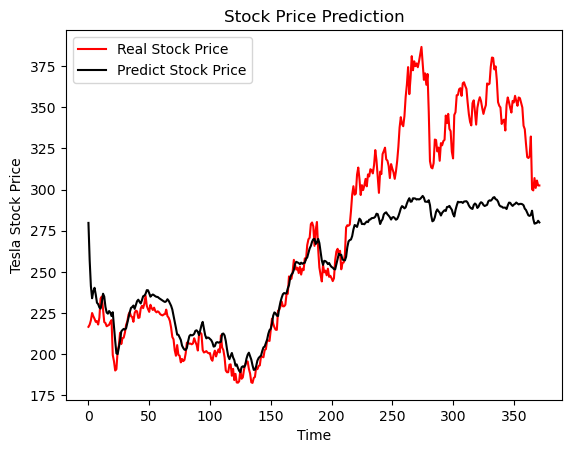

In [127]:
plt.plot(real_price, color = "red", label = "Real Stock Price")
plt.plot(pred, color = "black", label = "Predict Stock Price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()

In [ ]:
#1. LSTM 변경하고 RNN과 비교
#2. 관심있는 회사에 대해 예측모델

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

In [ ]:
embedding_dim = 10
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim)) #3494 -> 10차원
model.add(LSTM(hidden_units)) #lstm 셀 출력 : 128차원
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)